In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df.shape

(301, 9)

In [11]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [12]:
df.drop(['Car_Name'], axis=1, inplace=True)

df['Car_Age'] = 2024 - df['Year']
df.drop(['Year'], axis=1, inplace=True)

In [13]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


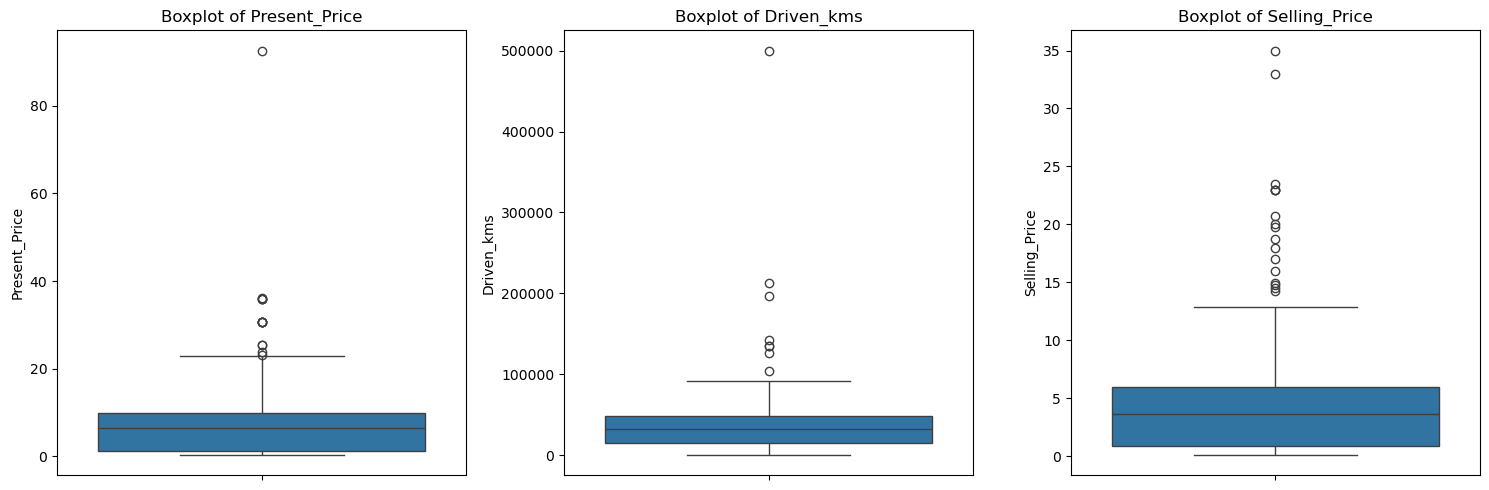

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Present_Price', 'Driven_kms', 'Selling_Price']

# Plot boxplots for each feature
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [15]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers
for col in ['Present_Price', 'Driven_kms', 'Selling_Price']:
    df = remove_outliers_iqr(df, col)

print("After outlier removal:", df.shape)

After outlier removal: (278, 8)


In [17]:
df = pd.get_dummies(df, drop_first=True)

In [18]:
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    r2 = r2_score(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)

    print(f"🔸 {name}")
    print(f"   R² Score: {r2:.4f}")
    print(f"   MAE     : {mae:.4f}")
    print("-" * 40)

🔸 Linear Regression
   R² Score: 0.7900
   MAE     : 1.0664
----------------------------------------
🔸 Ridge Regression
   R² Score: 0.7894
   MAE     : 1.0651
----------------------------------------
🔸 Decision Tree
   R² Score: 0.8481
   MAE     : 0.7246
----------------------------------------
🔸 Random Forest
   R² Score: 0.9243
   MAE     : 0.5807
----------------------------------------


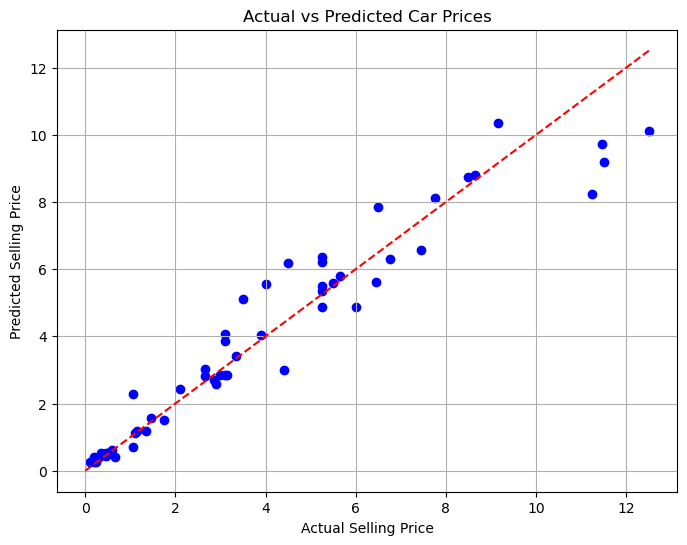

In [22]:
import matplotlib.pyplot as plt

best_model = RandomForestRegressor(random_state=42)
best_model.fit(xtrain, ytrain)
y_pred = best_model.predict(xtest)

plt.figure(figsize=(8,6))
plt.scatter(ytest, y_pred, color='blue')
plt.plot([0, max(ytest)], [0, max(ytest)], 'r--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid()
plt.show()